In [1]:
#ライブラリのインポート
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator

In [2]:
#データの読み込み
anime_data = pd.read_csv("./anime.csv")
rating_data = pd.read_csv("./rating.csv")
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
rating_data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


<AxesSubplot:>

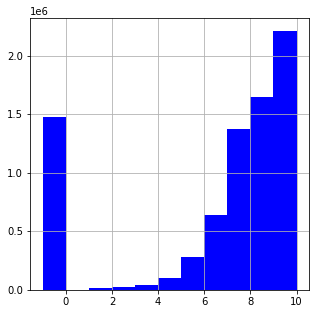

In [5]:
#各評価値のおおよその個数を確認
rating_data["rating"].hist(bins=11, figsize=(5, 5), color="b")

In [6]:
rating_data.replace(-1, np.nan, inplace=True)
rating_data.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [7]:
#人気アニメの確認
anime_data.sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [8]:
#基本統計量の確認
print(anime_data.describe())
print(rating_data.describe())

           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06
            user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  6.337241e+06
mean   3.672796e+04  8.909072e+03  7.808497e+00
std    2.099795e+04  8.883950e+03  1.572496e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.897400e+04  1.240000e+03  7.000000e+00
50%    3.679100e+04  6.213000e+03  8.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01


In [84]:
#データクレンジング
#レコメンド精度向上のために極端にmembersが少ないアニメを削除
new_anime_data = anime_data[anime_data["members"]>5000]
new_anime_data["episodes"] = new_anime_data["episodes"].replace({"Unknown": "0"})

<ipython-input-84-2007e39366c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_anime_data["episodes"] = new_anime_data["episodes"].replace({"Unknown": "0"})


In [85]:
#欠損値の確認
print(new_anime_data.isnull().sum())

anime_id     0
name         0
genre        3
type         5
episodes     0
rating      74
members      0
dtype: int64


In [86]:
#欠損値の削除
new_anime_data = new_anime_data.dropna()
new_anime_data.isnull().sum()
new_anime_data
print(new_anime_data.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [87]:
#再度基本統計量を確認
print(new_anime_data.describe())

           anime_id       rating       members
count   3911.000000  3911.000000  3.911000e+03
mean   10648.833291     7.284019  5.421194e+04
std    10501.672838     0.679322  8.667340e+04
min        1.000000     2.000000  5.001000e+03
25%     1497.000000     6.880000  1.011850e+04
50%     6927.000000     7.320000  2.213100e+04
75%    17795.000000     7.720000  5.852800e+04
max    34240.000000     9.370000  1.013917e+06


In [13]:
# raitingの値が0以上のみ残す
rating_data = rating_data[rating_data["rating"] >= 0]
print(rating_data.describe())

            user_id      anime_id        rating
count  6.337241e+06  6.337241e+06  6.337241e+06
mean   3.674791e+04  8.902866e+03  7.808497e+00
std    2.101340e+04  8.882000e+03  1.572496e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.898400e+04  1.239000e+03  7.000000e+00
50%    3.681500e+04  6.213000e+03  8.000000e+00
75%    5.487300e+04  1.407500e+04  9.000000e+00
max    7.351600e+04  3.447500e+04  1.000000e+01


In [14]:
#データフレームを結内部結合させる
data = pd.merge(rating_data, new_anime_data, on = "anime_id", how="inner")
data.rename(columns={'rating_x': 'rating'}, inplace=True)
data.rename(columns={'rating_y': 'rating_mean'}, inplace=True)
data

,user_id,anime_id,rating,name,genre,type,episodes,rating_mean,members
0,1,8074,10.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
3,12,8074,6.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
4,14,8074,6.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
...,...,...,...,...,...,...,...,...,...
6147485,72800,15227,10.0,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6147486,52145,32071,7.0,Gantz:O,"Action, Drama, Ecchi, Horror, Psychological, S...",Movie,1,7.34,8569
6147487,72800,32071,6.0,Gantz:O,"Action, Drama, Ecchi, Horror, Psychological, S...",Movie,1,7.34,8569
6147488,53061,31418,6.0,KanColle Movie,"Action, Military, School, Sci-Fi, Slice of Life",Movie,1,7.69,9439


In [15]:
data.describe()

,user_id,anime_id,rating,rating_mean,members
count,6.147490e+06,6.147490e+06,6.147490e+06,6.147490e+06,6.147490e+06
mean,3.670578e+04,8.952135e+03,7.843792e+00,7.710210e+00,1.901872e+05
std,2.102542e+04,8.905059e+03,1.551151e+00,6.381877e-01,1.911448e+05
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.001000e+03
25%,1.894900e+04,1.195000e+03,7.000000e+00,7.330000e+00,5.184400e+04
50%,3.668800e+04,6.347000e+03,8.000000e+00,7.720000e+00,1.232170e+05
75%,5.487300e+04,1.422700e+04,9.000000e+00,8.170000e+00,2.657910e+05
max,7.351600e+04,3.424000e+04,1.000000e+01,9.370000e+00,1.013917e+06


In [16]:
#データ量が多すぎて計算量が多く、PCのスペック上無理なのでデータ数を制限
data2 = data[['user_id', 'name', 'rating']]
data2 = data2[data2["user_id"] <= 10000]

In [17]:
#ユーザーID、アニメ名、ユーザー評価でピボットテーブルの作成
piv_rating = pd.pivot_table(data2, index=['user_id'], columns=['name'], values='rating')
piv_rating

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#標準化するためにそれぞれの評価値から平均を引く
#評価が一つのみ、または同じ評価をしたユーザーを全て削除する

#値の正規化
piv_norm = piv_rating.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

#評価しなかった人を表す0のみを含むすべての列を削除する
piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

In [19]:
#疎行列の作成
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)

In [20]:
#cos類似度の行列を作成
item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)

In [21]:
#行列をデータフレームにする
item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)


In [22]:
#cos類似度の最も高いtop10のアニメを返す関数
def top_anime(anime_name):
    count = 1
    print('Similar show to {} include:\n'.format(anime_name))
    for item in item_sim_df.sort_values(by = anime_name, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count += 1

In [23]:
#類似性の最も高いユーザー5人を返す関数
def top_users(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim)) 

In [24]:
#類似しているユーザーごとに最も評価の高いアニメを含むリストを作成し、アニメ名とリストに表示される頻度を返す関数
def similar_user_recs(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:, i].max()
        best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]

In [25]:
#類似しているユーザーの重み平均を計算して入力ユーザーの潜在的な評価を決定し表示する関数
def predicted_rating(anime_name, user):
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = piv_rating.loc[i, anime_name]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)

In [26]:
top_anime("Hunter x Hunter (2011)")

Similar show to Hunter x Hunter (2011) include:

No. 1: Fullmetal Alchemist: Brotherhood
No. 2: One Punch Man
No. 3: Steins;Gate
No. 4: Magi: The Kingdom of Magic
No. 5: Kiseijuu: Sei no Kakuritsu
No. 6: Haikyuu!! Second Season
No. 7: Code Geass: Hangyaku no Lelouch R2
No. 8: Shokugeki no Souma
No. 9: Shingeki no Kyojin
No. 10: Fate/Zero 2nd Season


In [27]:
top_users(52)

Most Similar Users:

User #4621, Similarity value: 0.29
User #8501, Similarity value: 0.29
User #822, Similarity value: 0.27
User #218, Similarity value: 0.27
User #8837, Similarity value: 0.26
User #569, Similarity value: 0.26
User #100, Similarity value: 0.25
User #1930, Similarity value: 0.24
User #3236, Similarity value: 0.23
User #2433, Similarity value: 0.23


In [28]:
similar_user_recs(52)

[('Code Geass: Hangyaku no Lelouch R2', 3),
 ('Dragon Ball', 2),
 ('Dragon Ball GT', 2),
 ('Code Geass: Hangyaku no Lelouch', 2),
 ('Fullmetal Alchemist: Brotherhood', 2)]

In [29]:
predicted_rating("Hunter x Hunter (2011)", 52)

9.236825461918766

In [93]:
one_hot_encoding = new_anime_data["genre"].str.get_dummies(sep=", ")

In [94]:
clustering_data = pd.concat([new_anime_data, one_hot_encoding], axis=1)

In [95]:
clustering_data["episodes"] = pd.to_numeric(clustering_data["episodes"], errors="coerce")

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(clustering_data["type"].values)
decoded = le.inverse_transform(encoded)
clustering_data["type_number"] = encoded
clustering_data

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,type_number
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,5
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,5
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,1,0,0,0,5
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,31283,Bikini Warriors Special,"Comedy, Ecchi, Fantasy, Parody, Yuri",Special,1,5.50,5191,0,0,0,...,0,0,0,0,0,0,0,0,1,4
12207,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551,0,0,0,...,0,0,0,0,0,0,0,1,0,3
12209,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463,0,0,0,...,0,0,0,0,0,0,0,1,0,3
12213,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411,0,0,0,...,0,0,0,0,0,0,0,1,0,3


In [124]:
new_clustering_data = clustering_data.drop(columns=["anime_id", "name", "genre", "type", "episodes", "rating", "members", "type_number"])
new_clustering_data

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
12207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [125]:
print(new_clustering_data.isnull().sum())

Action           0
Adventure        0
Cars             0
Comedy           0
Dementia         0
Demons           0
Drama            0
Ecchi            0
Fantasy          0
Game             0
Harem            0
Hentai           0
Historical       0
Horror           0
Josei            0
Kids             0
Magic            0
Martial Arts     0
Mecha            0
Military         0
Music            0
Mystery          0
Parody           0
Police           0
Psychological    0
Romance          0
Samurai          0
School           0
Sci-Fi           0
Seinen           0
Shoujo           0
Shoujo Ai        0
Shounen          0
Shounen Ai       0
Slice of Life    0
Space            0
Sports           0
Super Power      0
Supernatural     0
Thriller         0
Vampire          0
Yaoi             0
Yuri             0
dtype: int64


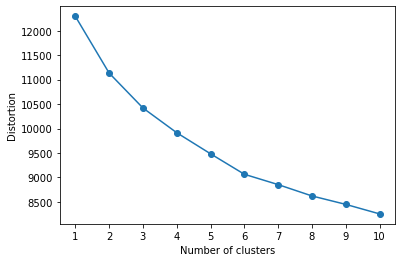

In [126]:
#クラスタリング
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#エルボー法
distortions = []
for i in range(1, 11):              
    km = KMeans(n_clusters=i,
                init="k-means++",     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                )
    km.fit(new_clustering_data) 
    distortions.append(km.inertia_)
    
# グラフのプロット
plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [127]:
#K-Means
n_clusters = 6
km = KMeans(n_clusters=n_clusters)
km.fit_predict(new_clustering_data)
cluster_labels = km.predict(new_clustering_data)

In [128]:
cluster_labels

array([3, 0, 5, ..., 2, 2, 2])

In [129]:
new_anime_data["cluster"] = cluster_labels
new_anime_data.head()

,anime_id,name,genre,type,episodes,rating,members,cluster
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,3
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,5
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,2
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5


In [130]:
new_anime_data[new_anime_data["cluster"] == 0]

,anime_id,name,genre,type,episodes,rating,members,cluster
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,0
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1,8.81,339556,0
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186,0
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,0,8.58,504862,0
...,...,...,...,...,...,...,...,...
7496,1751,Jikuu Bouken Nuumamonjaa,"Action, Comedy, Fantasy",OVA,1,5.37,5348,0
7714,112,Chou Henshin Cosprayers,"Action, Adventure, Comedy, Ecchi, Fantasy, Mag...",TV,8,5.11,5555,0
8298,33728,Chain Chronicle: Haecceitas no Hikari Part 1,"Action, Adventure, Fantasy, Magic, Shounen",Movie,1,6.67,5589,0
11129,11827,Kuroinu: Kedakaki Seijo wa Hakudaku ni Somaru,"Action, Fantasy, Hentai",OVA,4,7.49,10450,0


In [131]:
new_anime_data[new_anime_data["cluster"] == 1]

,anime_id,name,genre,type,episodes,rating,members,cluster
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,1
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,1
17,24701,Mushishi Zoku Shou 2nd Season,"Adventure, Fantasy, Historical, Mystery, Seine...",TV,10,8.88,75894,1
23,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458,1
27,21939,Mushishi Zoku Shou,"Adventure, Fantasy, Historical, Mystery, Seine...",TV,10,8.80,101351,1
...,...,...,...,...,...,...,...,...
11239,5719,Sex Pistols,"Comedy, Drama, Supernatural, Yaoi",OVA,2,7.00,15885,1
11278,4010,Alignment You! You! The Animation,"Demons, Hentai, School, Supernatural",OVA,2,6.89,6951,1
11280,972,Bible Black Gaiden,"Hentai, Supernatural",OVA,2,6.89,14478,1
11281,12055,Brandish,"Hentai, Supernatural",OVA,2,6.89,6742,1


In [132]:
new_anime_data[new_anime_data["cluster"] == 2]

,anime_id,name,genre,type,episodes,rating,members,cluster
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,2
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733,2
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193,2
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307,2
38,19,Monster,"Drama, Horror, Mystery, Police, Psychological,...",TV,74,8.72,247562,2
...,...,...,...,...,...,...,...,...
12096,724,Enzai,"Hentai, Horror, Yaoi",OVA,2,5.55,13711,2
12207,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551,2
12209,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463,2
12213,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411,2


In [133]:
new_anime_data[new_anime_data["cluster"] == 3]

,anime_id,name,genre,type,episodes,rating,members,cluster
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,3
16,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,3
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297,3
26,17074,Monogatari Series: Second Season,"Comedy, Mystery, Romance, Supernatural, Vampire",TV,26,8.80,205959,3
39,12365,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.71,133620,3
...,...,...,...,...,...,...,...,...
11357,2417,Saigo no Door wo Shimero!,"Comedy, Drama, Romance, Yaoi",OVA,1,6.76,9076,3
11530,746,Papa to Kiss in the Dark,"Comedy, Drama, Romance, Yaoi",OVA,2,6.47,28620,3
11554,8339,Kachou no Koi,"Comedy, Romance, Yaoi",OVA,1,6.43,6890,3
11566,8577,Aki-Sora: Yume no Naka,"Ecchi, Romance, Seinen, Yuri",OVA,2,6.41,37519,3


In [134]:
new_anime_data[new_anime_data["cluster"] == 4]

,anime_id,name,genre,type,episodes,rating,members,cluster
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,4
14,28891,Haikyuu!! Second Season,"Comedy, Drama, School, Shounen, Sports",TV,25,8.93,179342,4
20,263,Hajime no Ippo,"Comedy, Drama, Shounen, Sports",TV,75,8.83,157670,4
30,245,Great Teacher Onizuka,"Comedy, Drama, School, Shounen, Slice of Life",TV,43,8.77,268487,4
32,5258,Hajime no Ippo: New Challenger,"Comedy, Drama, Shounen, Sports",TV,26,8.75,88995,4
...,...,...,...,...,...,...,...,...
7916,788,Eiken: Eikenbu yori Ai wo Komete,"Comedy, Ecchi, Harem, School",OVA,2,4.65,15764,4
8013,16436,Tenshi no Drop,"Comedy, Ecchi, Shoujo Ai, Shounen",Special,1,3.96,6308,4
11246,5762,15 Bishoujo Hyouryuuki,"Comedy, Harem, Hentai",OVA,3,6.98,11680,4
11840,1496,Fushigi no Kuni no Miyuki-chan,"Comedy, Ecchi, Fantasy, Shoujo Ai, Yuri",OVA,2,6.00,7240,4


In [135]:
new_anime_data[new_anime_data["cluster"] == 5]

,anime_id,name,genre,type,episodes,rating,members,cluster
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,5
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,5
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,5
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,5
...,...,...,...,...,...,...,...,...
7544,33113,Scared Rider Xechs,"Adventure, Harem, Romance, Sci-Fi",TV,12,5.32,12594,5
8058,3287,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",OVA,1,2.00,7680,5
9132,31418,KanColle Movie,"Action, Military, School, Sci-Fi, Slice of Life",Movie,1,7.69,9439,5
11362,221,Mezzo Forte,"Action, Comedy, Hentai, Sci-Fi",OVA,2,6.75,14651,5
